In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
from scipy.stats import zscore

Data Preperation

In [2]:
atr = pd.read_csv('atr3.csv')
atr = atr.rename(columns = {'LPERMNO':'PERMNO','datadate':'DATE'})
atr = atr[['DATE','PERMNO','prccm','prchm','prclm']]
atr.DATE = pd.to_datetime(atr['DATE'])
atr.DATE = atr.DATE + MonthEnd(0)
atr = atr.set_index(['PERMNO', 'DATE'])
atr.sort_index(inplace= True)
atr

prccm    prchm    prclm
PERMNO DATE                                 
10000  1986-01-31    4.250    4.375    2.375
       1986-02-28    3.125    4.250    3.125
       1986-03-31    4.375    4.375    3.125
       1986-04-30    3.875    4.250    3.875
       1986-05-31    3.062    4.062    3.000
...                    ...      ...      ...
93436  2023-05-31  203.930  204.480  158.830
       2023-06-30  261.770  276.990  199.370
       2023-07-31  267.430  299.290  254.120
       2023-08-31  258.080  266.470  212.360
       2023-09-30  250.220  278.980  234.580

[3927360 rows x 3 columns]

In [3]:
df = pd.read_feather('crsp_monthly_stocks2.feather')
df['MV'] = np.abs(df.PRC) * df.SHROUT
df['PRC'] = np.abs(df['PRC'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'] = df.DATE + MonthEnd(0)
df.set_index(['PERMNO', 'DATE'],inplace = True)
df.sort_index(inplace = True)
df

SHRCD  EXCHCD   SICCD         PRC         VOL       RET  \
PERMNO  DATE                                                                  
10000.0 1986-01-31   10.0     3.0  3990.0    4.375000      1771.0       NaN   
        1986-02-28   10.0     3.0  3990.0    3.250000       828.0 -0.257143   
        1986-03-31   10.0     3.0  3990.0    4.437500      1078.0  0.365385   
        1986-04-30   10.0     3.0  3990.0    4.000000       957.0 -0.098592   
        1986-05-31   10.0     3.0  3990.0    3.109375      1074.0 -0.222656   
...                   ...     ...     ...         ...         ...       ...   
93436.0 2023-02-28   11.0     3.0  9999.0  205.710007  36239683.0  0.187565   
        2023-03-31   11.0     3.0  9999.0  207.460007  33115078.0  0.008507   
        2023-04-30   11.0     3.0  9999.0  164.309998  25038244.0 -0.207992   
        2023-05-31   11.0     3.0  9999.0  203.929993  26816033.0  0.241130   
        2023-06-30   11.0     3.0  9999.0  261.769989  34409322.0  0.283627   

                     SPREAD      RETX     SHROUT            MV  
PERMNO  DATE                                                    
10000.0 1986-01-31  0.25000       NaN     3680.0  1.610000e+04  
        1986-02-28  0.25000 -0.257143     3680.0  1.196000e+04  
        1986-03-31  0.12500  0.365385     3680.0  1.633000e+04  
        1986-04-30  0.25000 -0.098592     3793.0  1.517200e+04  
        1986-05-31  0.09375 -0.222656     3793.0  1.179386e+04  
...                     ...       ...        ...           ...  
93436.0 2023-02-28      NaN  0.187565  3164103.0  6.508876e+08  
        2023-03-31      NaN  0.008507  3169314.0  6.575059e+08  
        2023-04-30      NaN -0.207992  3169504.0  5.207812e+08  
        2023-05-31      NaN  0.241130  3169504.0  6.463569e+08  
        2023-06-30      NaN  0.283627  3169504.0  8.296810e+08  

[3452888 rows x 10 columns]

In [4]:
atr

prccm    prchm    prclm
PERMNO DATE                                 
10000  1986-01-31    4.250    4.375    2.375
       1986-02-28    3.125    4.250    3.125
       1986-03-31    4.375    4.375    3.125
       1986-04-30    3.875    4.250    3.875
       1986-05-31    3.062    4.062    3.000
...                    ...      ...      ...
93436  2023-05-31  203.930  204.480  158.830
       2023-06-30  261.770  276.990  199.370
       2023-07-31  267.430  299.290  254.120
       2023-08-31  258.080  266.470  212.360
       2023-09-30  250.220  278.980  234.580

[3927360 rows x 3 columns]

In [5]:
df

SHRCD  EXCHCD   SICCD         PRC         VOL       RET  \
PERMNO  DATE                                                                  
10000.0 1986-01-31   10.0     3.0  3990.0    4.375000      1771.0       NaN   
        1986-02-28   10.0     3.0  3990.0    3.250000       828.0 -0.257143   
        1986-03-31   10.0     3.0  3990.0    4.437500      1078.0  0.365385   
        1986-04-30   10.0     3.0  3990.0    4.000000       957.0 -0.098592   
        1986-05-31   10.0     3.0  3990.0    3.109375      1074.0 -0.222656   
...                   ...     ...     ...         ...         ...       ...   
93436.0 2023-02-28   11.0     3.0  9999.0  205.710007  36239683.0  0.187565   
        2023-03-31   11.0     3.0  9999.0  207.460007  33115078.0  0.008507   
        2023-04-30   11.0     3.0  9999.0  164.309998  25038244.0 -0.207992   
        2023-05-31   11.0     3.0  9999.0  203.929993  26816033.0  0.241130   
        2023-06-30   11.0     3.0  9999.0  261.769989  34409322.0  0.283627   

                     SPREAD      RETX     SHROUT            MV  
PERMNO  DATE                                                    
10000.0 1986-01-31  0.25000       NaN     3680.0  1.610000e+04  
        1986-02-28  0.25000 -0.257143     3680.0  1.196000e+04  
        1986-03-31  0.12500  0.365385     3680.0  1.633000e+04  
        1986-04-30  0.25000 -0.098592     3793.0  1.517200e+04  
        1986-05-31  0.09375 -0.222656     3793.0  1.179386e+04  
...                     ...       ...        ...           ...  
93436.0 2023-02-28      NaN  0.187565  3164103.0  6.508876e+08  
        2023-03-31      NaN  0.008507  3169314.0  6.575059e+08  
        2023-04-30      NaN -0.207992  3169504.0  5.207812e+08  
        2023-05-31      NaN  0.241130  3169504.0  6.463569e+08  
        2023-06-30      NaN  0.283627  3169504.0  8.296810e+08  

[3452888 rows x 10 columns]

In [6]:
df = df.merge(atr, on=['PERMNO','DATE'], how = 'left')
df

SHRCD  EXCHCD   SICCD         PRC         VOL       RET  \
PERMNO  DATE                                                                  
10000.0 1986-01-31   10.0     3.0  3990.0    4.375000      1771.0       NaN   
        1986-02-28   10.0     3.0  3990.0    3.250000       828.0 -0.257143   
        1986-03-31   10.0     3.0  3990.0    4.437500      1078.0  0.365385   
        1986-04-30   10.0     3.0  3990.0    4.000000       957.0 -0.098592   
        1986-05-31   10.0     3.0  3990.0    3.109375      1074.0 -0.222656   
...                   ...     ...     ...         ...         ...       ...   
93436.0 2023-02-28   11.0     3.0  9999.0  205.710007  36239683.0  0.187565   
        2023-03-31   11.0     3.0  9999.0  207.460007  33115078.0  0.008507   
        2023-04-30   11.0     3.0  9999.0  164.309998  25038244.0 -0.207992   
        2023-05-31   11.0     3.0  9999.0  203.929993  26816033.0  0.241130   
        2023-06-30   11.0     3.0  9999.0  261.769989  34409322.0  0.283627   

                     SPREAD      RETX     SHROUT            MV    prccm  \
PERMNO  DATE                                                              
10000.0 1986-01-31  0.25000       NaN     3680.0  1.610000e+04    4.250   
        1986-02-28  0.25000 -0.257143     3680.0  1.196000e+04    3.125   
        1986-03-31  0.12500  0.365385     3680.0  1.633000e+04    4.375   
        1986-04-30  0.25000 -0.098592     3793.0  1.517200e+04    3.875   
        1986-05-31  0.09375 -0.222656     3793.0  1.179386e+04    3.062   
...                     ...       ...        ...           ...      ...   
93436.0 2023-02-28      NaN  0.187565  3164103.0  6.508876e+08  205.710   
        2023-03-31      NaN  0.008507  3169314.0  6.575059e+08  207.460   
        2023-04-30      NaN -0.207992  3169504.0  5.207812e+08  164.310   
        2023-05-31      NaN  0.241130  3169504.0  6.463569e+08  203.930   
        2023-06-30      NaN  0.283627  3169504.0  8.296810e+08  261.770   

                       prchm    prclm  
PERMNO  DATE                           
10000.0 1986-01-31    4.3750    2.375  
        1986-02-28    4.2500    3.125  
        1986-03-31    4.3750    3.125  
        1986-04-30    4.2500    3.875  
        1986-05-31    4.0620    3.000  
...                      ...      ...  
93436.0 2023-02-28  217.6500  169.930  
        2023-03-31  207.7900  163.910  
        2023-04-30  202.6897  152.370  
        2023-05-31  204.4800  158.830  
        2023-06-30  276.9900  199.370  

[3452888 rows x 13 columns]

In [7]:
df = df[['VOL','PRC','RET','RETX','SHROUT','MV','prccm','prchm','prclm']]
df

VOL         PRC       RET      RETX     SHROUT  \
PERMNO  DATE                                                                
10000.0 1986-01-31      1771.0    4.375000       NaN       NaN     3680.0   
        1986-02-28       828.0    3.250000 -0.257143 -0.257143     3680.0   
        1986-03-31      1078.0    4.437500  0.365385  0.365385     3680.0   
        1986-04-30       957.0    4.000000 -0.098592 -0.098592     3793.0   
        1986-05-31      1074.0    3.109375 -0.222656 -0.222656     3793.0   
...                        ...         ...       ...       ...        ...   
93436.0 2023-02-28  36239683.0  205.710007  0.187565  0.187565  3164103.0   
        2023-03-31  33115078.0  207.460007  0.008507  0.008507  3169314.0   
        2023-04-30  25038244.0  164.309998 -0.207992 -0.207992  3169504.0   
        2023-05-31  26816033.0  203.929993  0.241130  0.241130  3169504.0   
        2023-06-30  34409322.0  261.769989  0.283627  0.283627  3169504.0   

                              MV    prccm     prchm    prclm  
PERMNO  DATE                                                  
10000.0 1986-01-31  1.610000e+04    4.250    4.3750    2.375  
        1986-02-28  1.196000e+04    3.125    4.2500    3.125  
        1986-03-31  1.633000e+04    4.375    4.3750    3.125  
        1986-04-30  1.517200e+04    3.875    4.2500    3.875  
        1986-05-31  1.179386e+04    3.062    4.0620    3.000  
...                          ...      ...       ...      ...  
93436.0 2023-02-28  6.508876e+08  205.710  217.6500  169.930  
        2023-03-31  6.575059e+08  207.460  207.7900  163.910  
        2023-04-30  5.207812e+08  164.310  202.6897  152.370  
        2023-05-31  6.463569e+08  203.930  204.4800  158.830  
        2023-06-30  8.296810e+08  261.770  276.9900  199.370  

[3452888 rows x 9 columns]

Momentum

In [8]:
df.reset_index(inplace=True)

In [9]:
df

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm
0,10000.0,1986-01-31,1771.0,4.375000,NaN,NaN,3680.0,1.610000e+04,4.250,4.3750,2.375
1,10000.0,1986-02-28,828.0,3.250000,-0.257143,-0.257143,3680.0,1.196000e+04,3.125,4.2500,3.125
2,10000.0,1986-03-31,1078.0,4.437500,0.365385,0.365385,3680.0,1.633000e+04,4.375,4.3750,3.125
3,10000.0,1986-04-30,957.0,4.000000,-0.098592,-0.098592,3793.0,1.517200e+04,3.875,4.2500,3.875
4,10000.0,1986-05-31,1074.0,3.109375,-0.222656,-0.222656,3793.0,1.179386e+04,3.062,4.0620,3.000
...,...,...,...,...,...,...,...,...,...,...,...
3452883,93436.0,2023-02-28,36239683.0,205.710007,0.187565,0.187565,3164103.0,6.508876e+08,205.710,217.6500,169.930
3452884,93436.0,2023-03-31,33115078.0,207.460007,0.008507,0.008507,3169314.0,6.575059e+08,207.460,207.7900,163.910
3452885,93436.0,2023-04-30,25038244.0,164.309998,-0.207992,-0.207992,3169504.0,5.207812e+08,164.310,202.6897,152.370
3452886,93436.0,2023-05-31,26816033.0,203.929993,0.241130,0.241130,3169504.0,6.463569e+08,203.930,204.4800,158.830


In [10]:
df = df.loc[df['DATE'] >= '1980-01-01']

In [11]:
df

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm
0,10000.0,1986-01-31,1771.0,4.375000,NaN,NaN,3680.0,1.610000e+04,4.250,4.3750,2.375
1,10000.0,1986-02-28,828.0,3.250000,-0.257143,-0.257143,3680.0,1.196000e+04,3.125,4.2500,3.125
2,10000.0,1986-03-31,1078.0,4.437500,0.365385,0.365385,3680.0,1.633000e+04,4.375,4.3750,3.125
3,10000.0,1986-04-30,957.0,4.000000,-0.098592,-0.098592,3793.0,1.517200e+04,3.875,4.2500,3.875
4,10000.0,1986-05-31,1074.0,3.109375,-0.222656,-0.222656,3793.0,1.179386e+04,3.062,4.0620,3.000
...,...,...,...,...,...,...,...,...,...,...,...
3452883,93436.0,2023-02-28,36239683.0,205.710007,0.187565,0.187565,3164103.0,6.508876e+08,205.710,217.6500,169.930
3452884,93436.0,2023-03-31,33115078.0,207.460007,0.008507,0.008507,3169314.0,6.575059e+08,207.460,207.7900,163.910
3452885,93436.0,2023-04-30,25038244.0,164.309998,-0.207992,-0.207992,3169504.0,5.207812e+08,164.310,202.6897,152.370
3452886,93436.0,2023-05-31,26816033.0,203.929993,0.241130,0.241130,3169504.0,6.463569e+08,203.930,204.4800,158.830


df['rankmv']=df.groupby('DATE')['MV'].rank(pct=True)
df = df[df['rankmv'].notna()]
df['rankmv zscore'] = df.groupby('DATE')['rankmv'].transform(lambda x: zscore(x,ddof =1))
df=df.loc[(df['rankmv zscore']<= 0.9)]

In [12]:
df=df.reset_index(drop=True)

In [13]:
df['Log Returns'] = np.log(1+ df['RET'])
df.sort_values(['PERMNO','DATE'])
df['moment0'] = df.groupby('PERMNO')['Log Returns'].rolling(6).sum().reset_index(drop=True)
df['Forward Return'] = df.groupby('PERMNO')['RET'].shift(-1)
df

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return
0,10000.0,1986-01-31,1771.0,4.375000,NaN,NaN,3680.0,1.610000e+04,4.250,4.3750,2.375,NaN,NaN,-0.257143
1,10000.0,1986-02-28,828.0,3.250000,-0.257143,-0.257143,3680.0,1.196000e+04,3.125,4.2500,3.125,-0.297252,NaN,0.365385
2,10000.0,1986-03-31,1078.0,4.437500,0.365385,0.365385,3680.0,1.633000e+04,4.375,4.3750,3.125,0.311436,NaN,-0.098592
3,10000.0,1986-04-30,957.0,4.000000,-0.098592,-0.098592,3793.0,1.517200e+04,3.875,4.2500,3.875,-0.103797,NaN,-0.222656
4,10000.0,1986-05-31,1074.0,3.109375,-0.222656,-0.222656,3793.0,1.179386e+04,3.062,4.0620,3.000,-0.251873,NaN,-0.005025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750814,93436.0,2023-02-28,36239683.0,205.710007,0.187565,0.187565,3164103.0,6.508876e+08,205.710,217.6500,169.930,0.171905,-0.292519,0.008507
2750815,93436.0,2023-03-31,33115078.0,207.460007,0.008507,0.008507,3169314.0,6.575059e+08,207.460,207.7900,163.910,0.008471,-0.245734,-0.207992
2750816,93436.0,2023-04-30,25038244.0,164.309998,-0.207992,-0.207992,3169504.0,5.207812e+08,164.310,202.6897,152.370,-0.233184,-0.325571,0.241130
2750817,93436.0,2023-05-31,26816033.0,203.929993,0.241130,0.241130,3169504.0,6.463569e+08,203.930,204.4800,158.830,0.216022,0.046317,0.283627


In [14]:
df['moment'] = df.groupby('PERMNO')['moment0'].shift(1)

In [15]:
df

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment
0,10000.0,1986-01-31,1771.0,4.375000,NaN,NaN,3680.0,1.610000e+04,4.250,4.3750,2.375,NaN,NaN,-0.257143,NaN
1,10000.0,1986-02-28,828.0,3.250000,-0.257143,-0.257143,3680.0,1.196000e+04,3.125,4.2500,3.125,-0.297252,NaN,0.365385,NaN
2,10000.0,1986-03-31,1078.0,4.437500,0.365385,0.365385,3680.0,1.633000e+04,4.375,4.3750,3.125,0.311436,NaN,-0.098592,NaN
3,10000.0,1986-04-30,957.0,4.000000,-0.098592,-0.098592,3793.0,1.517200e+04,3.875,4.2500,3.875,-0.103797,NaN,-0.222656,NaN
4,10000.0,1986-05-31,1074.0,3.109375,-0.222656,-0.222656,3793.0,1.179386e+04,3.062,4.0620,3.000,-0.251873,NaN,-0.005025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750814,93436.0,2023-02-28,36239683.0,205.710007,0.187565,0.187565,3164103.0,6.508876e+08,205.710,217.6500,169.930,0.171905,-0.292519,0.008507,-0.539675
2750815,93436.0,2023-03-31,33115078.0,207.460007,0.008507,0.008507,3169314.0,6.575059e+08,207.460,207.7900,163.910,0.008471,-0.245734,-0.207992,-0.292519
2750816,93436.0,2023-04-30,25038244.0,164.309998,-0.207992,-0.207992,3169504.0,5.207812e+08,164.310,202.6897,152.370,-0.233184,-0.325571,0.241130,-0.245734
2750817,93436.0,2023-05-31,26816033.0,203.929993,0.241130,0.241130,3169504.0,6.463569e+08,203.930,204.4800,158.830,0.216022,0.046317,0.283627,-0.325571


In [16]:
def tr(x):
    
    x['TR'] = np.maximum((x['prchm'] - x['prclm']),np.abs(x['prchm']-x['prccm'].shift(1)))
    x['TR'] = np.maximum(x['TR'],np.abs(x['prclm']-x['prccm'].shift(1)) )
    return x

df = df.groupby('PERMNO').apply(tr)

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\3789307594.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('PERMNO').apply(tr)


def tr(f):
    
    df = f.copy()
    tr = np.maximum((df['prchm'] - df['prclm']),np.abs(df['prchm']-df['prccm'].shift(1)))
    tr = np.maximum(tr,np.abs(df['prclm']-df['prccm'].shift(1)) )
    
    return tr

df['TR'] = df.groupby('PERMNO').transform(lambda x : tr(x))

In [17]:
def wwma(x, n=1):
    
    return x.ewm(alpha=1/n, adjust=False).mean()


df['atr'] = df.groupby('PERMNO')['TR'].transform(lambda x : wwma(x, n=1))

In [18]:
#df['atr'] = df['TR']

In [19]:
df.sort_values(['PERMNO', 'DATE'])

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr
0,10000.0,1986-01-31,1771.0,4.375000,NaN,NaN,3680.0,1.610000e+04,4.250,4.3750,2.375,NaN,NaN,-0.257143,NaN,NaN,NaN
1,10000.0,1986-02-28,828.0,3.250000,-0.257143,-0.257143,3680.0,1.196000e+04,3.125,4.2500,3.125,-0.297252,NaN,0.365385,NaN,1.125,1.125
2,10000.0,1986-03-31,1078.0,4.437500,0.365385,0.365385,3680.0,1.633000e+04,4.375,4.3750,3.125,0.311436,NaN,-0.098592,NaN,1.250,1.250
3,10000.0,1986-04-30,957.0,4.000000,-0.098592,-0.098592,3793.0,1.517200e+04,3.875,4.2500,3.875,-0.103797,NaN,-0.222656,NaN,0.500,0.500
4,10000.0,1986-05-31,1074.0,3.109375,-0.222656,-0.222656,3793.0,1.179386e+04,3.062,4.0620,3.000,-0.251873,NaN,-0.005025,NaN,1.062,1.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750814,93436.0,2023-02-28,36239683.0,205.710007,0.187565,0.187565,3164103.0,6.508876e+08,205.710,217.6500,169.930,0.171905,-0.292519,0.008507,-0.539675,47.720,47.720
2750815,93436.0,2023-03-31,33115078.0,207.460007,0.008507,0.008507,3169314.0,6.575059e+08,207.460,207.7900,163.910,0.008471,-0.245734,-0.207992,-0.292519,43.880,43.880
2750816,93436.0,2023-04-30,25038244.0,164.309998,-0.207992,-0.207992,3169504.0,5.207812e+08,164.310,202.6897,152.370,-0.233184,-0.325571,0.241130,-0.245734,55.090,55.090
2750817,93436.0,2023-05-31,26816033.0,203.929993,0.241130,0.241130,3169504.0,6.463569e+08,203.930,204.4800,158.830,0.216022,0.046317,0.283627,-0.325571,45.650,45.650


In [20]:
data = df[df['moment'].notna()]

In [21]:
data=data.reset_index(drop=True)

In [22]:
data.sort_values('DATE',inplace=True)
data

,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr
674439,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,19.250,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875
775904,38658.0,1980-07-31,1907.0,23.375000,0.013968,-0.010582,8355.0,1.952981e+05,23.375,24.000,22.750,0.013872,0.128349,-0.096257,0.071626,1.250,1.250
1006233,52230.0,1980-07-31,NaN,16.750000,0.063492,0.063492,1621.0,2.715175e+04,16.500,16.500,15.000,0.061558,0.001358,0.104478,-0.074589,1.500,1.500
1247024,64822.0,1980-07-31,NaN,8.250000,0.000000,0.000000,5072.0,4.184400e+04,8.125,8.750,7.750,0.000000,-0.073025,0.212121,0.405465,1.000,1.000
1388517,74932.0,1980-07-31,NaN,60.500000,-0.024194,-0.024194,5470.0,3.309350e+05,60.000,61.000,60.000,-0.024491,-0.053118,0.037190,0.010289,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505032,21597.0,2023-06-30,549192.0,34.080002,0.177984,0.174767,117300.0,3.997584e+06,34.080,34.500,28.790,0.163804,0.085255,NaN,-0.087798,5.710,5.710
505049,21598.0,2023-06-30,41459.0,11.350000,0.180698,0.165298,32695.0,3.710883e+05,11.350,11.540,9.270,0.166106,-0.031825,NaN,-0.411286,2.270,2.270
505066,21599.0,2023-06-30,194065.0,2.760000,0.018450,0.018450,150757.0,4.160893e+05,2.760,3.375,2.490,0.018282,-0.445707,NaN,-1.024599,0.885,0.885
2306338,89006.0,2023-06-30,1282004.0,72.940002,-0.001158,-0.006402,1361853.0,9.933356e+07,72.940,74.730,71.860,-0.001159,0.100953,NaN,0.093571,2.870,2.870


In [23]:
data.reset_index(inplace=True)
data

,index,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr
0,674439,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,19.250,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875
1,775904,38658.0,1980-07-31,1907.0,23.375000,0.013968,-0.010582,8355.0,1.952981e+05,23.375,24.000,22.750,0.013872,0.128349,-0.096257,0.071626,1.250,1.250
2,1006233,52230.0,1980-07-31,NaN,16.750000,0.063492,0.063492,1621.0,2.715175e+04,16.500,16.500,15.000,0.061558,0.001358,0.104478,-0.074589,1.500,1.500
3,1247024,64822.0,1980-07-31,NaN,8.250000,0.000000,0.000000,5072.0,4.184400e+04,8.125,8.750,7.750,0.000000,-0.073025,0.212121,0.405465,1.000,1.000
4,1388517,74932.0,1980-07-31,NaN,60.500000,-0.024194,-0.024194,5470.0,3.309350e+05,60.000,61.000,60.000,-0.024491,-0.053118,0.037190,0.010289,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530008,505032,21597.0,2023-06-30,549192.0,34.080002,0.177984,0.174767,117300.0,3.997584e+06,34.080,34.500,28.790,0.163804,0.085255,NaN,-0.087798,5.710,5.710
2530009,505049,21598.0,2023-06-30,41459.0,11.350000,0.180698,0.165298,32695.0,3.710883e+05,11.350,11.540,9.270,0.166106,-0.031825,NaN,-0.411286,2.270,2.270
2530010,505066,21599.0,2023-06-30,194065.0,2.760000,0.018450,0.018450,150757.0,4.160893e+05,2.760,3.375,2.490,0.018282,-0.445707,NaN,-1.024599,0.885,0.885
2530011,2306338,89006.0,2023-06-30,1282004.0,72.940002,-0.001158,-0.006402,1361853.0,9.933356e+07,72.940,74.730,71.860,-0.001159,0.100953,NaN,0.093571,2.870,2.870


In [24]:
data['Momentum zscore'] = data.groupby('DATE')['moment'].transform(lambda x: zscore(x,ddof =1))
data

,index,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore
0,674439,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,19.250,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875,-0.572201
1,775904,38658.0,1980-07-31,1907.0,23.375000,0.013968,-0.010582,8355.0,1.952981e+05,23.375,24.000,22.750,0.013872,0.128349,-0.096257,0.071626,1.250,1.250,0.199520
2,1006233,52230.0,1980-07-31,NaN,16.750000,0.063492,0.063492,1621.0,2.715175e+04,16.500,16.500,15.000,0.061558,0.001358,0.104478,-0.074589,1.500,1.500,-0.400289
3,1247024,64822.0,1980-07-31,NaN,8.250000,0.000000,0.000000,5072.0,4.184400e+04,8.125,8.750,7.750,0.000000,-0.073025,0.212121,0.405465,1.000,1.000,1.569002
4,1388517,74932.0,1980-07-31,NaN,60.500000,-0.024194,-0.024194,5470.0,3.309350e+05,60.000,61.000,60.000,-0.024491,-0.053118,0.037190,0.010289,1.000,1.000,-0.052102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530008,505032,21597.0,2023-06-30,549192.0,34.080002,0.177984,0.174767,117300.0,3.997584e+06,34.080,34.500,28.790,0.163804,0.085255,NaN,-0.087798,5.710,5.710,0.148064
2530009,505049,21598.0,2023-06-30,41459.0,11.350000,0.180698,0.165298,32695.0,3.710883e+05,11.350,11.540,9.270,0.166106,-0.031825,NaN,-0.411286,2.270,2.270,-0.495717
2530010,505066,21599.0,2023-06-30,194065.0,2.760000,0.018450,0.018450,150757.0,4.160893e+05,2.760,3.375,2.490,0.018282,-0.445707,NaN,-1.024599,0.885,0.885,-1.716284
2530011,2306338,89006.0,2023-06-30,1282004.0,72.940002,-0.001158,-0.006402,1361853.0,9.933356e+07,72.940,74.730,71.860,-0.001159,0.100953,NaN,0.093571,2.870,2.870,0.509010


In [25]:
data = data[data['atr'].notna()]

In [26]:
data

,index,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore
0,674439,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,19.250,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875,-0.572201
1,775904,38658.0,1980-07-31,1907.0,23.375000,0.013968,-0.010582,8355.0,1.952981e+05,23.375,24.000,22.750,0.013872,0.128349,-0.096257,0.071626,1.250,1.250,0.199520
2,1006233,52230.0,1980-07-31,NaN,16.750000,0.063492,0.063492,1621.0,2.715175e+04,16.500,16.500,15.000,0.061558,0.001358,0.104478,-0.074589,1.500,1.500,-0.400289
3,1247024,64822.0,1980-07-31,NaN,8.250000,0.000000,0.000000,5072.0,4.184400e+04,8.125,8.750,7.750,0.000000,-0.073025,0.212121,0.405465,1.000,1.000,1.569002
4,1388517,74932.0,1980-07-31,NaN,60.500000,-0.024194,-0.024194,5470.0,3.309350e+05,60.000,61.000,60.000,-0.024491,-0.053118,0.037190,0.010289,1.000,1.000,-0.052102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530008,505032,21597.0,2023-06-30,549192.0,34.080002,0.177984,0.174767,117300.0,3.997584e+06,34.080,34.500,28.790,0.163804,0.085255,NaN,-0.087798,5.710,5.710,0.148064
2530009,505049,21598.0,2023-06-30,41459.0,11.350000,0.180698,0.165298,32695.0,3.710883e+05,11.350,11.540,9.270,0.166106,-0.031825,NaN,-0.411286,2.270,2.270,-0.495717
2530010,505066,21599.0,2023-06-30,194065.0,2.760000,0.018450,0.018450,150757.0,4.160893e+05,2.760,3.375,2.490,0.018282,-0.445707,NaN,-1.024599,0.885,0.885,-1.716284
2530011,2306338,89006.0,2023-06-30,1282004.0,72.940002,-0.001158,-0.006402,1361853.0,9.933356e+07,72.940,74.730,71.860,-0.001159,0.100953,NaN,0.093571,2.870,2.870,0.509010


In [27]:
data.sort_values('DATE',inplace=True)
data.reset_index(inplace=True)
data= data.drop('index',axis = 1)

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\3625439974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('DATE',inplace=True)


In [28]:
data['ATR zscore'] = data.groupby('DATE')['atr'].transform(lambda x: zscore(x,ddof =1))
data

,level_0,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,prchm,prclm,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore,ATR zscore
0,0,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,19.250,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875,-0.572201,0.582748
1,2857,80128.0,1980-07-31,NaN,16.250000,0.250000,0.250000,1313.0,2.133625e+04,16.000,16.500,12.500,0.223144,0.164622,0.007692,-0.249577,4.000,4.000,-1.118129,0.333714
2,2858,45022.0,1980-07-31,309.0,16.250000,0.171171,0.171171,1111.0,1.805375e+04,16.250,16.875,13.750,0.158004,0.047253,0.623077,0.013388,3.125,3.125,-0.039387,0.084679
3,2859,67803.0,1980-07-31,NaN,5.750000,0.179487,0.179487,1130.0,6.497500e+03,5.500,5.500,4.500,0.165080,-0.055982,0.021739,0.007197,1.000,1.000,-0.064784,-0.520120
4,2860,28039.0,1980-07-31,NaN,2.187500,0.093750,0.093750,792.0,1.732500e+03,1.875,1.875,1.750,0.089612,0.154151,0.971429,-0.060625,0.125,0.125,-0.343004,-0.769155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477323,2527260,86048.0,2023-06-30,28592.0,22.350000,0.158329,0.152656,27189.0,6.076742e+05,22.350,22.500,19.160,0.146979,0.103607,NaN,-0.163755,3.340,3.340,-0.003100,-0.021991
2477324,2527261,19081.0,2023-06-30,92585.0,117.970001,0.189573,0.189573,21952.0,2.589677e+06,117.970,122.810,98.685,0.173595,0.149190,NaN,-0.061496,24.125,24.125,0.200407,0.015244
2477325,2527262,18065.0,2023-06-30,227363.0,7.570000,-0.085749,-0.085749,64960.0,4.917472e+05,7.570,8.680,7.290,-0.089650,-0.006583,NaN,0.156569,1.390,1.390,0.634383,-0.025484
2477326,2527232,16678.0,2023-06-30,1263438.0,47.000000,0.036841,0.036841,717746.0,3.373406e+07,47.000,47.505,43.560,0.036178,0.064590,NaN,-0.069993,3.945,3.945,0.183497,-0.020907


In [29]:
data['Momentum rank'] = data.groupby('DATE')['Momentum zscore'].rank(pct=True)

In [30]:
data

,level_0,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,...,prclm,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore,ATR zscore,Momentum rank
0,0,31077.0,1980-07-31,2937.0,18.750000,0.282051,0.282051,2956.0,5.542500e+04,18.750,...,14.375,0.248461,-0.174201,0.022667,-0.116496,4.875,4.875,-0.572201,0.582748,0.231026
1,2857,80128.0,1980-07-31,NaN,16.250000,0.250000,0.250000,1313.0,2.133625e+04,16.000,...,12.500,0.223144,0.164622,0.007692,-0.249577,4.000,4.000,-1.118129,0.333714,0.102308
2,2858,45022.0,1980-07-31,309.0,16.250000,0.171171,0.171171,1111.0,1.805375e+04,16.250,...,13.750,0.158004,0.047253,0.623077,0.013388,3.125,3.125,-0.039387,0.084679,0.480769
3,2859,67803.0,1980-07-31,NaN,5.750000,0.179487,0.179487,1130.0,6.497500e+03,5.500,...,4.500,0.165080,-0.055982,0.021739,0.007197,1.000,1.000,-0.064784,-0.520120,0.468462
4,2860,28039.0,1980-07-31,NaN,2.187500,0.093750,0.093750,792.0,1.732500e+03,1.875,...,1.750,0.089612,0.154151,0.971429,-0.060625,0.125,0.125,-0.343004,-0.769155,0.317436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477323,2527260,86048.0,2023-06-30,28592.0,22.350000,0.158329,0.152656,27189.0,6.076742e+05,22.350,...,19.160,0.146979,0.103607,NaN,-0.163755,3.340,3.340,-0.003100,-0.021991,0.409531
2477324,2527261,19081.0,2023-06-30,92585.0,117.970001,0.189573,0.189573,21952.0,2.589677e+06,117.970,...,98.685,0.173595,0.149190,NaN,-0.061496,24.125,24.125,0.200407,0.015244,0.542574
2477325,2527262,18065.0,2023-06-30,227363.0,7.570000,-0.085749,-0.085749,64960.0,4.917472e+05,7.570,...,7.290,-0.089650,-0.006583,NaN,0.156569,1.390,1.390,0.634383,-0.025484,0.827770
2477326,2527232,16678.0,2023-06-30,1263438.0,47.000000,0.036841,0.036841,717746.0,3.373406e+07,47.000,...,43.560,0.036178,0.064590,NaN,-0.069993,3.945,3.945,0.183497,-0.020907,0.529269


Porfolio Selection

In [31]:
port1 = data.loc[(data['Momentum rank'] >= 0.8)]
port2 = data.loc[(data['Momentum rank'] <= 0.2)]

In [32]:
port1['ATR rank'] = port1.groupby('DATE')['ATR zscore'].rank(pct=True)
port1

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\769828982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port1['ATR rank'] = port1.groupby('DATE')['ATR zscore'].rank(pct=True)


,level_0,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,...,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore,ATR zscore,Momentum rank,ATR rank
5,2862,33582.0,1980-07-31,2878.0,9.125000,0.196721,0.196721,5104.0,4.657400e+04,9.125,...,0.179586,0.070952,0.945205,0.304211,2.7500,2.7500,1.153636,-0.022050,0.905641,0.540333
6,2863,65294.0,1980-07-31,NaN,12.250000,-0.039216,-0.039216,1454.0,1.781150e+04,12.125,...,-0.040005,0.176071,-0.147959,0.290184,0.3750,0.3750,1.096093,-0.698002,0.899231,0.101152
12,2869,67766.0,1980-07-31,NaN,3.312500,0.261905,0.261905,1616.0,5.353000e+03,3.125,...,0.232622,0.099091,0.566038,0.211309,0.8750,0.8750,0.772530,-0.555696,0.838462,0.230474
14,2870,23501.0,1980-07-31,6734.0,13.750000,0.018519,0.018519,41988.0,5.773350e+05,13.750,...,0.018349,0.248348,-0.045091,0.219070,0.7500,0.7500,0.804367,-0.591273,0.845385,0.197823
27,2871,16011.0,1980-07-31,NaN,38.875000,0.352174,0.352174,4052.0,1.575215e+05,38.750,...,0.301714,0.441476,-0.048232,0.206971,10.5000,10.5000,0.754733,2.183686,0.832051,0.932778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477294,2527265,76721.0,2023-06-30,9696.0,193.500000,-0.009926,-0.009926,17142.0,3.316977e+06,193.500,...,-0.009976,0.286270,NaN,0.245012,21.0382,21.0382,0.810395,0.009714,0.880987,0.888755
2477297,2527234,48486.0,2023-06-30,265705.0,642.859985,0.045216,0.042419,134340.0,8.636181e+07,642.860,...,0.044224,0.430887,NaN,0.273943,56.4550,56.4550,0.867973,0.073160,0.894533,0.972189
2477301,2527238,10107.0,2023-06-30,5470225.0,340.540009,0.036999,0.036999,7435488.0,2.532081e+09,340.540,...,0.036331,0.355435,NaN,0.257181,28.9700,28.9700,0.834613,0.023923,0.888002,0.925030
2477306,2527243,77263.0,2023-06-30,874.0,6.150000,-0.120172,-0.120172,5641.0,3.469215e+04,6.150,...,-0.128028,0.088343,NaN,0.202261,0.9400,0.9400,0.725317,-0.026290,0.858974,0.181983


In [33]:
port2['ATR rank'] = port2.groupby('DATE')['ATR zscore'].rank(pct=True)
port2

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\1699676712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port2['ATR rank'] = port2.groupby('DATE')['ATR zscore'].rank(pct=True)


,level_0,PERMNO,DATE,VOL,PRC,RET,RETX,SHROUT,MV,prccm,...,Log Returns,moment0,Forward Return,moment,TR,atr,Momentum zscore,ATR zscore,Momentum rank,ATR rank
1,2857,80128.0,1980-07-31,NaN,16.250,0.250000,0.250000,1313.0,2.133625e+04,16.00,...,0.223144,0.164622,0.007692,-0.249577,4.000,4.000,-1.118129,0.333714,0.102308,0.875000
8,2865,44901.0,1980-07-31,NaN,1.375,0.100000,0.100000,797.0,1.095875e+03,1.25,...,0.095310,-0.167054,0.045455,-0.262364,0.250,0.250,-1.170586,-0.733578,0.091795,0.141026
10,2867,57613.0,1980-07-31,239.0,4.000,-0.058824,-0.058824,1585.0,6.340000e+03,4.00,...,-0.060625,-0.210565,0.125000,-0.187212,0.500,0.500,-0.862293,-0.662425,0.151282,0.250641
17,2874,39773.0,1980-07-31,562.0,3.000,0.043478,0.043478,2059.0,6.177000e+03,3.00,...,0.042560,-0.287682,0.500000,-0.265703,0.500,0.500,-1.184283,-0.662425,0.090769,0.250641
18,2875,67775.0,1980-07-31,NaN,3.375,-0.281053,-0.289474,731.0,2.467125e+03,3.00,...,-0.329967,-0.597472,0.111111,-0.538757,1.000,1.000,-2.304410,-0.520120,0.017179,0.446795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477303,2527240,18116.0,2023-06-30,306297.0,1.950,0.010363,0.010363,88914.0,1.733823e+05,1.95,...,0.010309,-0.570545,NaN,-0.420890,0.745,0.745,-0.514829,-0.026639,0.190614,0.417676
2477305,2527242,18115.0,2023-06-30,9521.0,10.770,0.053816,0.053816,17704.0,1.906721e+05,10.77,...,0.052418,-0.348208,NaN,-0.436675,0.960,0.960,-0.546245,-0.026254,0.182874,0.489104
2477308,2527245,19066.0,2023-06-30,150424.0,2.230,0.211957,0.211957,2226.0,4.963980e+03,2.23,...,0.192236,-0.073467,NaN,-0.498797,1.180,1.180,-0.669874,-0.025860,0.153362,0.541768
2477309,2527246,18100.0,2023-06-30,115119.0,24.820,0.136967,0.136967,53398.0,1.325338e+06,24.82,...,0.128365,-0.320868,NaN,-0.631262,10.770,10.770,-0.933496,-0.008680,0.108128,0.969734


In [34]:
long = port1.loc[port1['ATR rank']>=.80]
short = port2.loc[port2['ATR rank']>=.80]

In [35]:
long_returns = long.groupby('DATE')['Forward Return'].mean()
long_portfolio = long_returns.reset_index()
long_portfolio

,DATE,Forward Return
0,1980-07-31,0.072637
1,1980-08-31,0.058095
2,1980-09-30,0.057356
3,1980-10-31,0.181018
4,1980-11-30,-0.061761
...,...,...
511,2023-02-28,0.004110
512,2023-03-31,-0.007801
513,2023-04-30,0.022493
514,2023-05-31,0.080541


In [36]:
short_returns = short.groupby('DATE')['Forward Return'].mean()
short_portfolio = short_returns.reset_index()
short_portfolio

,DATE,Forward Return
0,1980-07-31,0.051949
1,1980-08-31,0.012322
2,1980-09-30,0.022674
3,1980-10-31,0.078529
4,1980-11-30,-0.001497
...,...,...
511,2023-02-28,-0.090208
512,2023-03-31,-0.043689
513,2023-04-30,-0.011186
514,2023-05-31,0.053023


In [37]:
long_portfolio.rename(columns = {'Forward Return' : 'long returns'}, inplace=True)
short_portfolio.rename(columns = {'Forward Return' : 'short returns'}, inplace=True)

full_portfolio = pd.merge(long_portfolio, short_portfolio, on = ['DATE'])
full_portfolio

,DATE,long returns,short returns
0,1980-07-31,0.072637,0.051949
1,1980-08-31,0.058095,0.012322
2,1980-09-30,0.057356,0.022674
3,1980-10-31,0.181018,0.078529
4,1980-11-30,-0.061761,-0.001497
...,...,...,...
511,2023-02-28,0.004110,-0.090208
512,2023-03-31,-0.007801,-0.043689
513,2023-04-30,0.022493,-0.011186
514,2023-05-31,0.080541,0.053023


In [38]:
full_portfolio['Return'] = full_portfolio['long returns'] - full_portfolio['short returns']

In [39]:
full_portfolio['Cost'] = np.abs(full_portfolio['Return']) *.02
full_portfolio['ReturnT'] = full_portfolio['Return'] - full_portfolio['Cost']

In [40]:
full_portfolio

,DATE,long returns,short returns,Return,Cost,ReturnT
0,1980-07-31,0.072637,0.051949,0.020688,0.000414,0.020275
1,1980-08-31,0.058095,0.012322,0.045773,0.000915,0.044858
2,1980-09-30,0.057356,0.022674,0.034683,0.000694,0.033989
3,1980-10-31,0.181018,0.078529,0.102489,0.002050,0.100439
4,1980-11-30,-0.061761,-0.001497,-0.060263,0.001205,-0.061469
...,...,...,...,...,...,...
511,2023-02-28,0.004110,-0.090208,0.094317,0.001886,0.092431
512,2023-03-31,-0.007801,-0.043689,0.035888,0.000718,0.035171
513,2023-04-30,0.022493,-0.011186,0.033680,0.000674,0.033006
514,2023-05-31,0.080541,0.053023,0.027518,0.000550,0.026968


In [41]:
full_portfolio['Gross Return'] = full_portfolio['Return'] + 1
full_portfolio = full_portfolio[full_portfolio['Return'].notna()]
full_portfolio['Growth'] = full_portfolio['Gross Return'].cumprod()

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\2398185642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_portfolio['Growth'] = full_portfolio['Gross Return'].cumprod()


In [42]:
full_portfolio

,DATE,long returns,short returns,Return,Cost,ReturnT,Gross Return,Growth
0,1980-07-31,0.072637,0.051949,0.020688,0.000414,0.020275,1.020688,1.020688
1,1980-08-31,0.058095,0.012322,0.045773,0.000915,0.044858,1.045773,1.067408
2,1980-09-30,0.057356,0.022674,0.034683,0.000694,0.033989,1.034683,1.104429
3,1980-10-31,0.181018,0.078529,0.102489,0.002050,0.100439,1.102489,1.217621
4,1980-11-30,-0.061761,-0.001497,-0.060263,0.001205,-0.061469,0.939737,1.144243
...,...,...,...,...,...,...,...,...
510,2023-01-31,-0.008300,-0.096097,0.087797,0.001756,0.086041,1.087797,492.711884
511,2023-02-28,0.004110,-0.090208,0.094317,0.001886,0.092431,1.094317,539.183045
512,2023-03-31,-0.007801,-0.043689,0.035888,0.000718,0.035171,1.035888,558.533461
513,2023-04-30,0.022493,-0.011186,0.033680,0.000674,0.033006,1.033680,577.344612


In [43]:
full_portfolio['Gross ReturnT'] = full_portfolio['ReturnT'] + 1
full_portfolio = full_portfolio[full_portfolio['ReturnT'].notna()]
full_portfolio['GrowthT'] = full_portfolio['Gross ReturnT'].cumprod()

C:\Users\Ian Caples\AppData\Local\Temp\ipykernel_1292\3841445169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_portfolio['Gross ReturnT'] = full_portfolio['ReturnT'] + 1


<Axes: xlabel='DATE'>

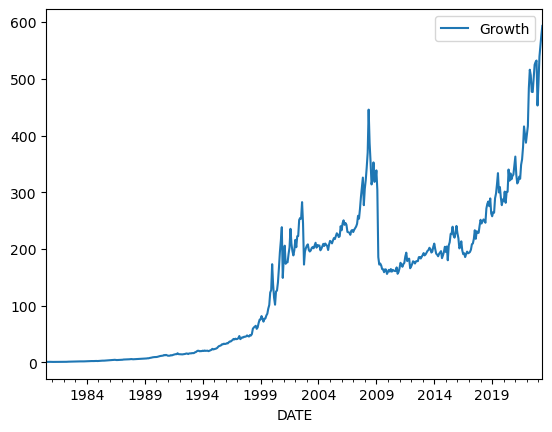

In [44]:
full_portfolio.plot(kind='line', x='DATE', y='Growth')

<Axes: title={'center': 'Growth of $1 Including Trading Costs'}, xlabel='DATE'>

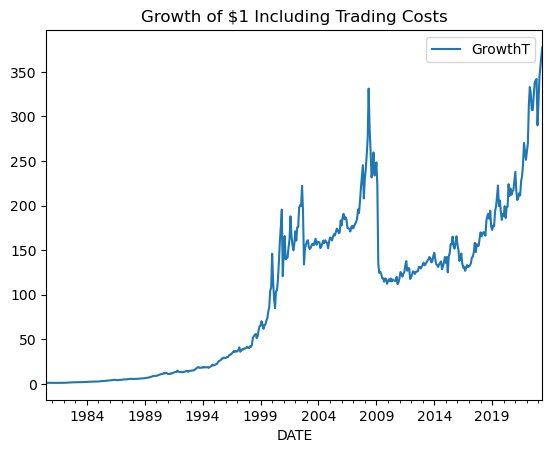

In [45]:
full_portfolio.plot(kind='line', x='DATE', y='GrowthT', title= 'Growth of $1 Including Trading Costs')

Varinace Analysis

In [46]:
rf = pd.read_csv('ffmodel.csv')
rf = rf.rename(columns= {'dateff':'DATE'})
rf.DATE = pd.to_datetime(rf.DATE)
rf = rf.set_index('DATE')
rf = rf.drop('umd',axis = 1)
rf

,mktrf,smb,hml,rf
DATE,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-30,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2023-03-31,0.0251,-0.0551,-0.0885,0.0036
2023-04-28,0.0061,-0.0335,-0.0004,0.0035
2023-05-31,0.0035,0.0161,-0.0772,0.0036


In [47]:
full_portfolio = full_portfolio.merge(rf,how='left', on ='DATE')

In [48]:
full_portfolio.rf = full_portfolio.rf.fillna(method = 'ffill')
full_portfolio.mktrf = full_portfolio.mktrf.fillna(method = 'ffill')
full_portfolio.smb = full_portfolio.smb.fillna(method = 'ffill')
full_portfolio.hml = full_portfolio.hml.fillna(method = 'ffill')
full_portfolio

,DATE,long returns,short returns,Return,Cost,ReturnT,Gross Return,Growth,Gross ReturnT,GrowthT,mktrf,smb,hml,rf
0,1980-07-31,0.072637,0.051949,0.020688,0.000414,0.020275,1.020688,1.020688,1.020275,1.020275,0.0649,0.0414,-0.0641,0.0053
1,1980-08-31,0.058095,0.012322,0.045773,0.000915,0.044858,1.045773,1.067408,1.044858,1.066042,0.0649,0.0414,-0.0641,0.0053
2,1980-09-30,0.057356,0.022674,0.034683,0.000694,0.033989,1.034683,1.104429,1.033989,1.102275,0.0219,0.0098,-0.0459,0.0075
3,1980-10-31,0.181018,0.078529,0.102489,0.002050,0.100439,1.102489,1.217621,1.100439,1.212987,0.0106,0.0247,-0.0276,0.0095
4,1980-11-30,-0.061761,-0.001497,-0.060263,0.001205,-0.061469,0.939737,1.144243,0.938531,1.138426,0.0106,0.0247,-0.0276,0.0095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2023-01-31,-0.008300,-0.096097,0.087797,0.001756,0.086041,1.087797,492.711884,1.086041,315.086509,0.0665,0.0501,-0.0401,0.0035
511,2023-02-28,0.004110,-0.090208,0.094317,0.001886,0.092431,1.094317,539.183045,1.092431,344.210197,-0.0258,0.0117,-0.0081,0.0034
512,2023-03-31,-0.007801,-0.043689,0.035888,0.000718,0.035171,1.035888,558.533461,1.035171,356.316286,0.0251,-0.0551,-0.0885,0.0036
513,2023-04-30,0.022493,-0.011186,0.033680,0.000674,0.033006,1.033680,577.344612,1.033006,368.076845,0.0251,-0.0551,-0.0885,0.0036


In [49]:
full_portfolio['Excess ReturnT'] = full_portfolio.ReturnT - full_portfolio.rf
full_portfolio

,DATE,long returns,short returns,Return,Cost,ReturnT,Gross Return,Growth,Gross ReturnT,GrowthT,mktrf,smb,hml,rf,Excess ReturnT
0,1980-07-31,0.072637,0.051949,0.020688,0.000414,0.020275,1.020688,1.020688,1.020275,1.020275,0.0649,0.0414,-0.0641,0.0053,0.014975
1,1980-08-31,0.058095,0.012322,0.045773,0.000915,0.044858,1.045773,1.067408,1.044858,1.066042,0.0649,0.0414,-0.0641,0.0053,0.039558
2,1980-09-30,0.057356,0.022674,0.034683,0.000694,0.033989,1.034683,1.104429,1.033989,1.102275,0.0219,0.0098,-0.0459,0.0075,0.026489
3,1980-10-31,0.181018,0.078529,0.102489,0.002050,0.100439,1.102489,1.217621,1.100439,1.212987,0.0106,0.0247,-0.0276,0.0095,0.090939
4,1980-11-30,-0.061761,-0.001497,-0.060263,0.001205,-0.061469,0.939737,1.144243,0.938531,1.138426,0.0106,0.0247,-0.0276,0.0095,-0.070969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2023-01-31,-0.008300,-0.096097,0.087797,0.001756,0.086041,1.087797,492.711884,1.086041,315.086509,0.0665,0.0501,-0.0401,0.0035,0.082541
511,2023-02-28,0.004110,-0.090208,0.094317,0.001886,0.092431,1.094317,539.183045,1.092431,344.210197,-0.0258,0.0117,-0.0081,0.0034,0.089031
512,2023-03-31,-0.007801,-0.043689,0.035888,0.000718,0.035171,1.035888,558.533461,1.035171,356.316286,0.0251,-0.0551,-0.0885,0.0036,0.031571
513,2023-04-30,0.022493,-0.011186,0.033680,0.000674,0.033006,1.033680,577.344612,1.033006,368.076845,0.0251,-0.0551,-0.0885,0.0036,0.029406


In [50]:
#max drawdown
full_portfolio['Cumlative Returns'] = (1+full_portfolio['ReturnT']).cumprod()
full_portfolio['Cumlative Max'] = full_portfolio['Cumlative Returns'].cummax()
full_portfolio['Drawdown'] = (full_portfolio['Cumlative Returns']/full_portfolio['Cumlative Max']) - 1
full_portfolio['Drawdown'].min()

-0.6624882632406177

In [51]:
#sharpe ratio
stats = full_portfolio['Excess ReturnT'].describe()
stats['Annualized Excess Return'] = stats.loc['mean'] * 12
stats['Annualized Standard Deviation'] = stats.loc['std']*np.sqrt(12)
stats['Sharpe Ratio'] = stats.loc['mean'] / stats.loc['std'] * np.sqrt(12)
stats['Max Drawdown'] = -1*full_portfolio['Drawdown'].min()
stats

count                            515.000000
mean                               0.010402
std                                0.061896
min                               -0.397728
25%                               -0.013016
50%                                0.015559
75%                                0.037429
max                                0.345739
Annualized Excess Return           0.124820
Annualized Standard Deviation      0.214415
Sharpe Ratio                       0.582143
Max Drawdown                       0.662488
Name: Excess ReturnT, dtype: float64

In [52]:
#soritino ratio
full_portfolio['mkt'] = full_portfolio['mktrf'] + full_portfolio['rf']
full_portfolio['ReturnvB'] = full_portfolio['ReturnT'] - full_portfolio['mkt']
full_portfolio['DD'] = (np.minimum(0,full_portfolio['Excess ReturnT']))**2
mins = full_portfolio['DD'].describe()
stats['Soritino Ratio'] = (full_portfolio['ReturnvB'].mean())/ np.sqrt((mins.loc['mean'])) *np.sqrt(12)                       

In [53]:
stats

count                            515.000000
mean                               0.010402
std                                0.061896
min                               -0.397728
25%                               -0.013016
50%                                0.015559
75%                                0.037429
max                                0.345739
Annualized Excess Return           0.124820
Annualized Standard Deviation      0.214415
Sharpe Ratio                       0.582143
Max Drawdown                       0.662488
Soritino Ratio                     0.221500
Name: Excess ReturnT, dtype: float64

In [54]:
#Calmar
stats['Calmar Ratio'] = stats.loc['mean']/stats['Max Drawdown']

In [55]:
#information ratio
stats['Information Ratio'] = full_portfolio['ReturnvB'].mean()/ full_portfolio['ReturnvB'].std() * np.sqrt(12)

In [56]:
stats

count                            515.000000
mean                               0.010402
std                                0.061896
min                               -0.397728
25%                               -0.013016
50%                                0.015559
75%                                0.037429
max                                0.345739
Annualized Excess Return           0.124820
Annualized Standard Deviation      0.214415
Sharpe Ratio                       0.582143
Max Drawdown                       0.662488
Soritino Ratio                     0.221500
Calmar Ratio                       0.015701
Information Ratio                  0.124730
Name: Excess ReturnT, dtype: float64

CAPM Analysis

In [57]:
import statsmodels.formula.api as smf

In [58]:
full_portfolio = full_portfolio.dropna()

In [59]:
capm = full_portfolio[['Excess ReturnT', 'mktrf']]
x=capm['Excess ReturnT']
mkt=capm['mktrf']
cmodel = smf.ols(formula= 'x ~ mkt' ,data=capm)
resultsC = cmodel.fit()
resultsC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04244
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.837
Time:                        14:03:28   Log-Likelihood:                 702.65
No. Observations:                 515   AIC:                            -1401.
Df Residuals:                     513   BIC:                            -1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0103      0.003      3.721      0.000       0.005       0.016
mkt            0.0126      0.061      0.206      0.837      -0.107       0.132
==============================================================================
Omnibus:                      165.187   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2256.481
Skew:                          -0.994   Prob(JB):                         0.00
Kurtosis:                      13.060   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FAMA French Analysis

In [60]:
fama = full_portfolio[['mktrf', 'smb','hml','Excess ReturnT']]
x = fama['Excess ReturnT']
mkt = fama['mktrf']
smb = fama['smb']
hml = fama['hml']

fmodel = smf.ols(formula = 'x ~ mkt+smb+hml', data=fama)
resultsF = fmodel.fit()
resultsF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.183
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.316
Time:                        14:03:28   Log-Likelihood:                 704.41
No. Observations:                 515   AIC:                            -1401.
Df Residuals:                     511   BIC:                            -1384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0107      0.003      3.866      0.000       0.005       0.016
mkt           -0.0171      0.063     -0.271      0.787      -0.141       0.107
smb            0.0416      0.092      0.453      0.650      -0.139       0.222
hml           -0.1524      0.090     -1.694      0.091      -0.329       0.024
==============================================================================
Omnibus:                      157.421   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1983.473
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                      12.424   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
stats = stats.drop(['min','25%','50%','75%','max'])
stats['t stat (Excess Return)'] = stats.loc['mean']*np.sqrt(stats.loc['count']) / stats.loc['std']
stats['Tracking Error'] = full_portfolio['ReturnvB'].std()*np.sqrt(12)
stats

count                            515.000000
mean                               0.010402
std                                0.061896
Annualized Excess Return           0.124820
Annualized Standard Deviation      0.214415
Sharpe Ratio                       0.582143
Max Drawdown                       0.662488
Soritino Ratio                     0.221500
Calmar Ratio                       0.015701
Information Ratio                  0.124730
t stat (Excess Return)             3.813667
Tracking Error                     0.263622
Name: Excess ReturnT, dtype: float64